# Decision Trees

To display decision trees, you need to install pydot and pydotplus:

<code>conda install pydot
pip install pydotplus
</code>

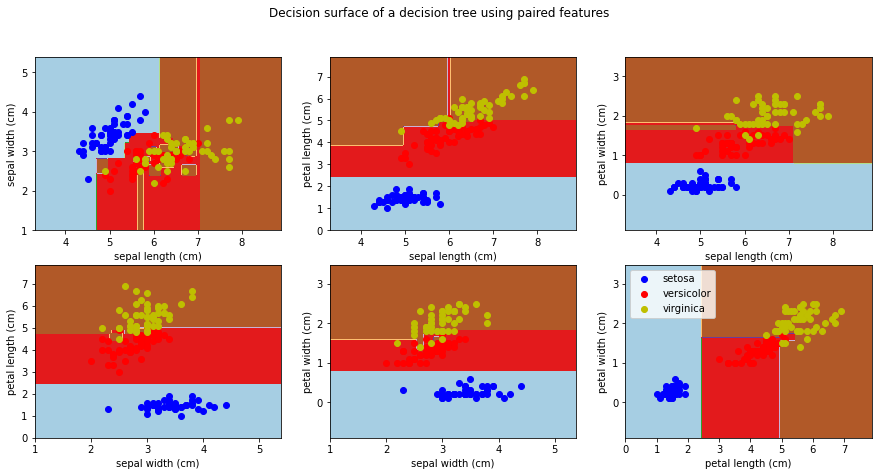

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree 

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=[15,7])

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

In [3]:
dtc = tree.DecisionTreeClassifier(criterion='entropy')#, max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[13  0]
 [ 0  7]]

 Classifcation Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


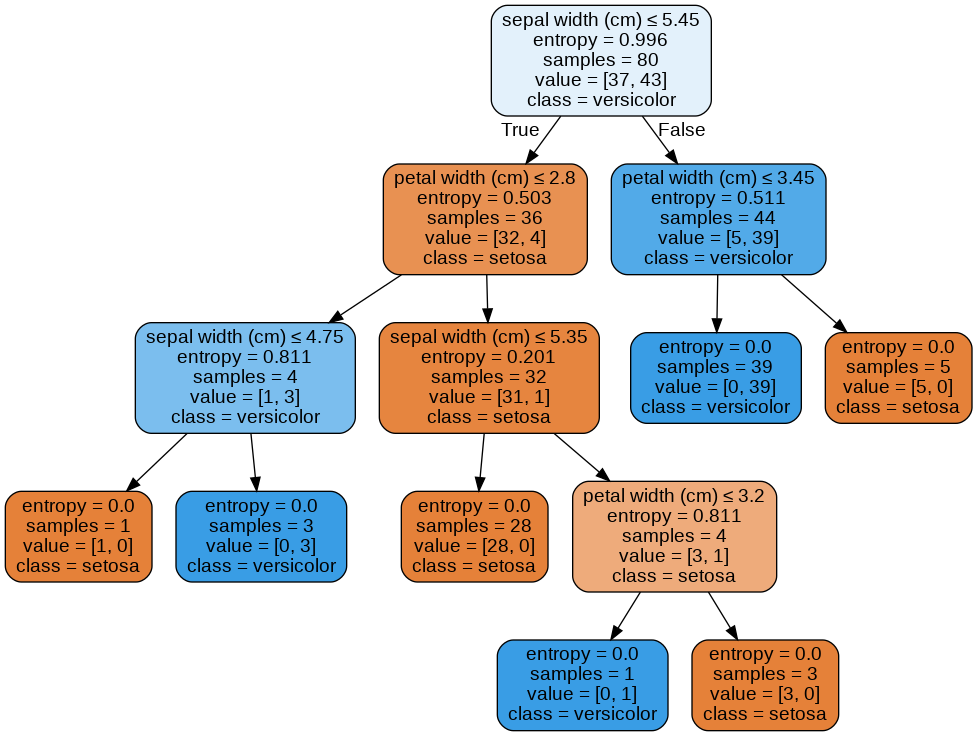

In [4]:
feature_names = [#'sepal length (cm)',
 'sepal width (cm)',
 #'petal length (cm)',
 'petal width (cm)']

target_names = ['setosa', 'versicolor', 'virginica']

import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=feature_names,  
                          class_names=target_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## KDD Cup Dataset

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2,l1
from keras.optimizers import SGD
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

np.random.seed = 47

# If you are NOT using google colab, you need to take this part out starting from here
from google.colab import files

uploaded=files.upload()
# till here

data = pd.read_csv('kddcup.data_10_percent.csv',header=None)
dataCols = ['duration','protocol_type','service','flag','src_bytes','dst_bytes',
    'land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',
    'root_shell','su_attempted','num_root','num_file_creations','num_shells',
    'num_access_files','num_outbound_cmds','is_host_login','is_guest_login',
    'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
    'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
    'dst_host_rerror_rate','dst_host_srv_rerror_rate','target']
data.columns = dataCols

print("Shape: ", data.shape)
data = data.reindex(np.random.permutation(data.index)).reset_index(drop=True)

target = data['target'].copy()
data = data.drop('target', axis=1)

discreteCols = ['protocol_type','service','flag']
dataDummies = pd.get_dummies(data[discreteCols])
data = data.drop(discreteCols, axis=1)

data = dataDummies.join(data)

target[target != 'normal.'] = 'abnormal'
target[target == 'normal.'] = 'normal'
print("Targets: ", target.unique())

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=50)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

Saving kddcup.data_10_percent.csv to kddcup.data_10_percent.csv
Shape:  (494021, 42)
Targets:  ['abnormal' 'normal']
(247010, 118)
(247010,)
(247011, 118)
(247011,)


In [7]:
dtc = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc.fit(X_train, y_train)
predicted = dtc.predict(X_test)

print("Decision Tree Results\nConfusion Matrix: ")
print(confusion_matrix(y_test,predicted))
print("\n Classifcation Report")
print(classification_report(y_test,predicted))

Decision Tree Results
Confusion Matrix: 
[[197999    595]
 [   799  47618]]

 Classifcation Report
              precision    recall  f1-score   support

    abnormal       1.00      1.00      1.00    198594
      normal       0.99      0.98      0.99     48417

    accuracy                           0.99    247011
   macro avg       0.99      0.99      0.99    247011
weighted avg       0.99      0.99      0.99    247011



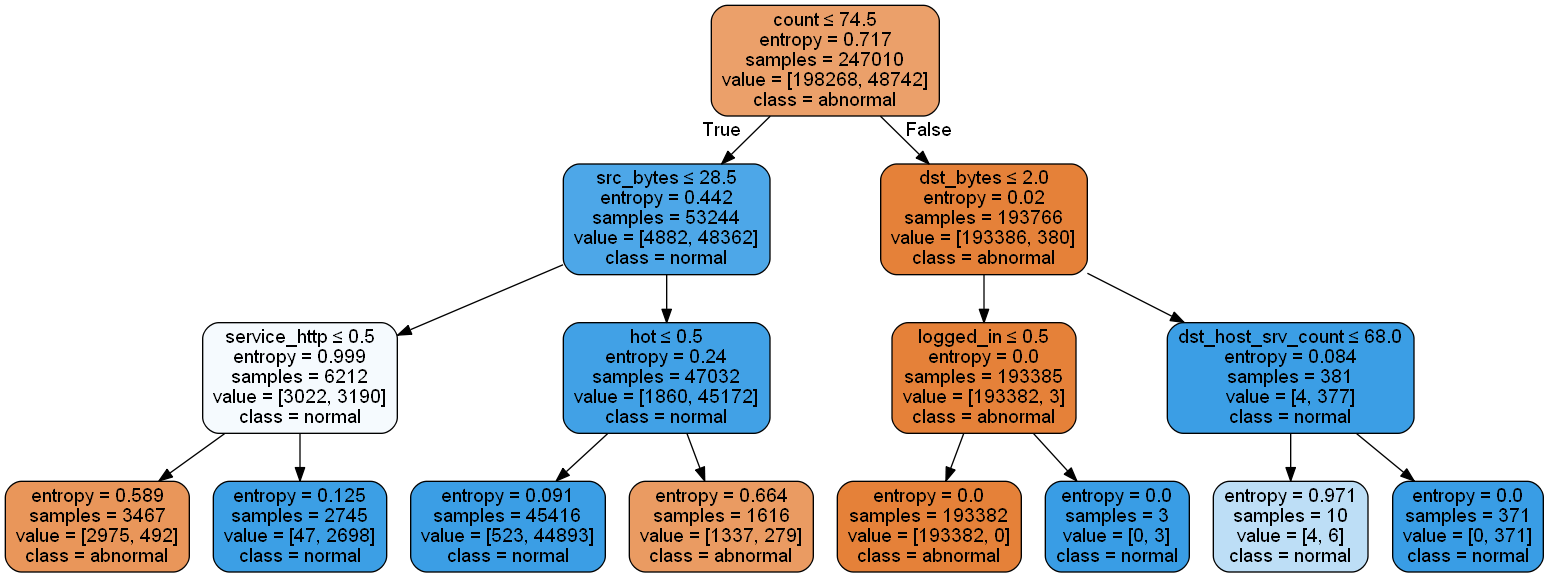

In [ ]:
import pydotplus 
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(dtc, out_file=dot_data,
                          feature_names=X_train.columns,  
                          class_names=['abnormal','normal'],  
                          filled=True, rounded=True,  
                          special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

## Decision Tree Regression

In [9]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# If you are NOT using google colab, you need to take this part out starting from here
from google.colab import files

uploaded=files.upload()
# till here

advertising = pd.read_csv('Advertising.csv',usecols=(1,2,3,4))

X = np.array(advertising['TV']).reshape(-1,1)
y = np.array(advertising['Sales'])

Saving Advertising.csv to Advertising.csv


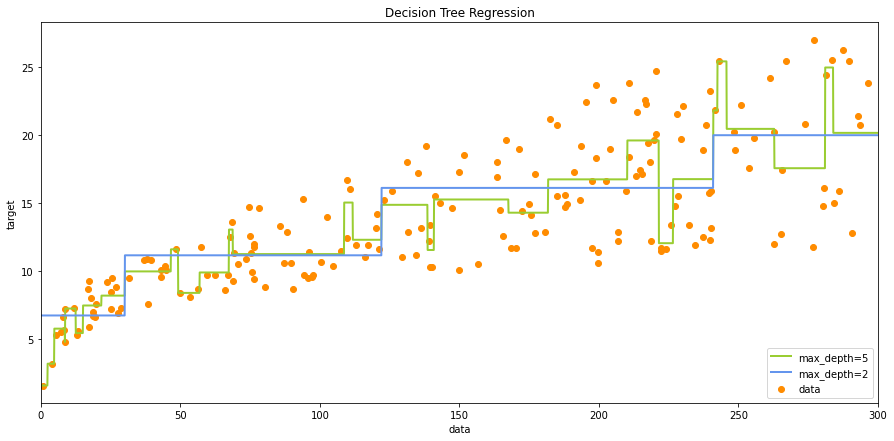

In [10]:
# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 300, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=[15,7])
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.xlim([0,300])
plt.title("Decision Tree Regression")
plt.legend(loc='lower right')
plt.show()

## Voting Classifier

In [11]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_iris()
X_iris, y_iris = iris.data[:, 1:3], iris.target

clf1 = LogisticRegression(random_state=1,solver='lbfgs',multi_class='auto')
clf2 = RandomForestClassifier(random_state=1,n_estimators=10)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X_iris, y_iris, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.04) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.04) [Ensemble]
